In [95]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [96]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


In [97]:
#get data
dataset_turkey = pd.read_excel("fortensor.xlsx")
#read data
date_E = dataset_turkey["observation_date"]
ecomsa_E = dataset_turkey["ECOMSA"]
print(type(ecomsa_E[2]))


<class 'numpy.float64'>


In [98]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

Epoch 1/250
9/9 [==============================] - 0s 627us/step - loss: 33352646656.0000 - root_mean_squared_error: 182627.0625
Epoch 2/250
9/9 [==============================] - 0s 888us/step - loss: 33044580352.0000 - root_mean_squared_error: 181781.6875
Epoch 3/250
9/9 [==============================] - 0s 770us/step - loss: 32808005632.0000 - root_mean_squared_error: 181129.7969
Epoch 4/250
9/9 [==============================] - 0s 682us/step - loss: 32585228288.0000 - root_mean_squared_error: 180513.7969
Epoch 5/250
9/9 [==============================] - 0s 699us/step - loss: 32367687680.0000 - root_mean_squared_error: 179910.2188
Epoch 6/250
9/9 [==============================] - 0s 769us/step - loss: 32162967552.0000 - root_mean_squared_error: 179340.3750
Epoch 7/250
9/9 [==============================] - 0s 831us/step - loss: 31946557440.0000 - root_mean_squared_error: 178736.0000
Epoch 8/250
9/9 [==============================] - 0s 766us/step - loss: 31732850688.0000 - root_

9/9 [==============================] - 0s 651us/step - loss: 22159544320.0000 - root_mean_squared_error: 148860.8281
Epoch 65/250
9/9 [==============================] - 0s 806us/step - loss: 22025857024.0000 - root_mean_squared_error: 148411.1094
Epoch 66/250
9/9 [==============================] - 0s 549us/step - loss: 21887475712.0000 - root_mean_squared_error: 147944.1719
Epoch 67/250
9/9 [==============================] - 0s 695us/step - loss: 21748961280.0000 - root_mean_squared_error: 147475.2969
Epoch 68/250
9/9 [==============================] - 0s 728us/step - loss: 21625636864.0000 - root_mean_squared_error: 147056.5781
Epoch 69/250
9/9 [==============================] - 0s 605us/step - loss: 21500594176.0000 - root_mean_squared_error: 146630.8125
Epoch 70/250
9/9 [==============================] - 0s 584us/step - loss: 21365204992.0000 - root_mean_squared_error: 146168.4062
Epoch 71/250
9/9 [==============================] - 0s 620us/step - loss: 21243518976.0000 - root_mean_

9/9 [==============================] - 0s 684us/step - loss: 15916801024.0000 - root_mean_squared_error: 126161.8047
Epoch 127/250
9/9 [==============================] - 0s 628us/step - loss: 15847003136.0000 - root_mean_squared_error: 125884.8828
Epoch 128/250
9/9 [==============================] - 0s 680us/step - loss: 15774276608.0000 - root_mean_squared_error: 125595.6875
Epoch 129/250
9/9 [==============================] - 0s 663us/step - loss: 15706758144.0000 - root_mean_squared_error: 125326.6094
Epoch 130/250
9/9 [==============================] - 0s 583us/step - loss: 15641935872.0000 - root_mean_squared_error: 125067.7266
Epoch 131/250
9/9 [==============================] - 0s 615us/step - loss: 15574831104.0000 - root_mean_squared_error: 124799.1641
Epoch 132/250
9/9 [==============================] - 0s 755us/step - loss: 15507399680.0000 - root_mean_squared_error: 124528.7109
Epoch 133/250
9/9 [==============================] - 0s 710us/step - loss: 15444375552.0000 - roo

9/9 [==============================] - 0s 705us/step - loss: 12877149184.0000 - root_mean_squared_error: 113477.5234
Epoch 189/250
9/9 [==============================] - 0s 580us/step - loss: 12844939264.0000 - root_mean_squared_error: 113335.5156
Epoch 190/250
9/9 [==============================] - 0s 658us/step - loss: 12815666176.0000 - root_mean_squared_error: 113206.2969
Epoch 191/250
9/9 [==============================] - 0s 728us/step - loss: 12783945728.0000 - root_mean_squared_error: 113066.1094
Epoch 192/250
9/9 [==============================] - 0s 602us/step - loss: 12752892928.0000 - root_mean_squared_error: 112928.7109
Epoch 193/250
9/9 [==============================] - 0s 621us/step - loss: 12723009536.0000 - root_mean_squared_error: 112796.3203
Epoch 194/250
9/9 [==============================] - 0s 665us/step - loss: 12694395904.0000 - root_mean_squared_error: 112669.4062
Epoch 195/250
9/9 [==============================] - 0s 665us/step - loss: 12667383808.0000 - roo

9/9 [==============================] - 0s 573us/step - loss: 11584822272.0000 - root_mean_squared_error: 107632.8125


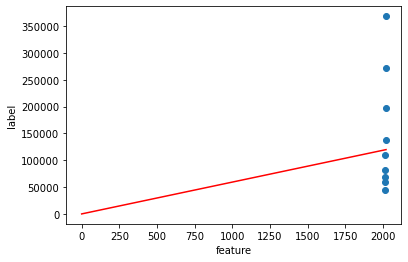

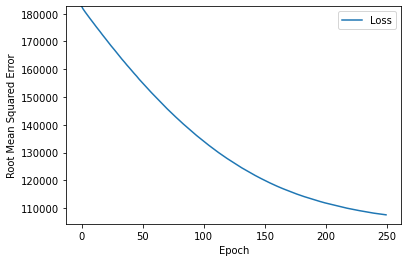

In [107]:
my_feature = ([2011,2012,2013,2014,2015,2016,2017,2018,2019])
my_label = ([45104.57,60265.08,69114.95,82732.12,110673,137252,197325.5,271517.7,368394.7])
learning_rate=0.05
epochs=250
my_batch_size=1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)